# Load the dataset in pandas dataframe and perform basic data checks

For this project, we will use the Loan Prediction Problem Dataset from Kaggle. 
link: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset


In [1]:
import pandas as pd
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

file_path = "../data/train_u6lujuX_CVtuZ9i.csv"
data_df = pd.read_csv(file_path)

# drop the Loan_ID column  as it is not a feature
data_df.drop(columns=["Loan_ID"], inplace=True)
#  uncomment the following line to display the first 2 rows of the dataframe
data_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [2]:
#  uncomment the following line to display the last 2 rows of the dataframe
# data_df.tail(2)

In [3]:
# uncomment the following line to display the dataset dimensions
# data_df.shape

In [4]:
# Uncomment the following line to display detailed column informations
# data_df.info()


In [5]:
# Uncomment the following line to check for missing values
# data_df.isnull().sum().to_frame()


In [6]:
# Uncomment the following line to check for duplicate rows
# data_df.duplicated().sum()

In [7]:
# uncomment the following line to display statistical summary of the dataframe
# data_df.describe()

In [8]:
# Uncomment the following line to display the value counts of the Gender column
# data_df["Gender"].value_counts().to_frame()


In [9]:
# Uncomment the following line to display the number of unique values in each column
# data_df.nunique().to_frame()

In [10]:
# Uncomment the following line to display the data types of the columns
# data_df.dtypes.to_frame()

In [11]:
# Quick correlation matrix

# select only the numerical columns
numerical_df = data_df.select_dtypes(include=["number"])

# calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# uncomment the following line to display the correlation matrix
# correlation_matrix


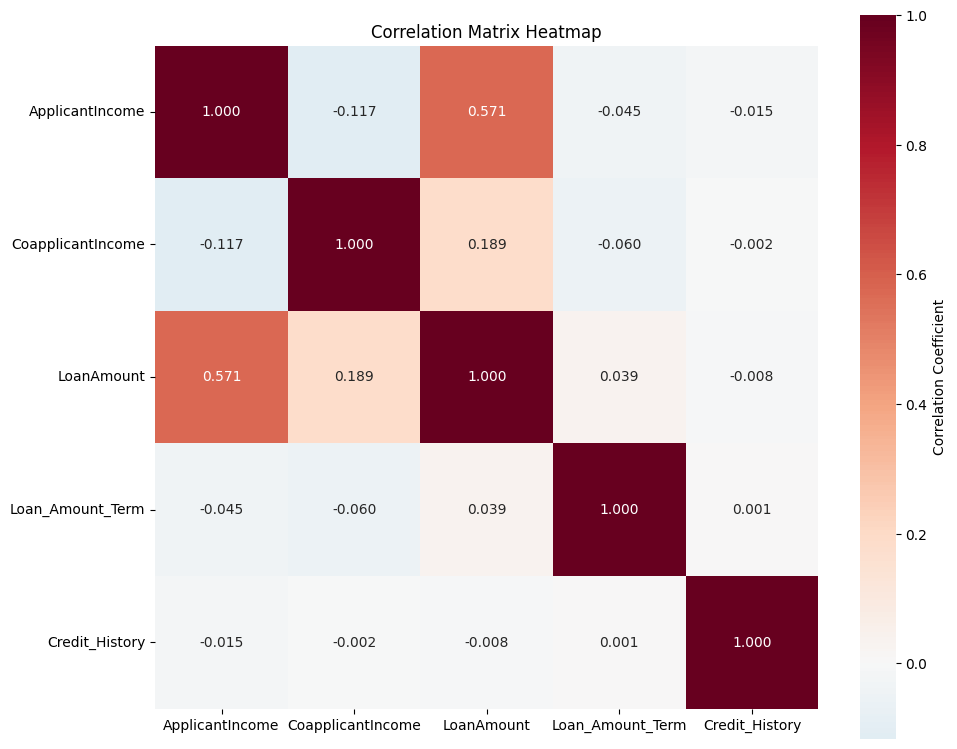

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="RdBu_r",
    center=0,
    square=True,
    fmt=".3f",
    cbar_kws={"label": "Correlation Coefficient"},
)

plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

# Handling Missing Values

We'll analyze missing value patterns and apply suitable imputation strategies based on data types and context.


In [13]:
# Comprehensive missing value analysis
missing_values = data_df.isnull().sum()
total_rows = len(data_df)

# Create a detailed missing value report
missing_report = pd.DataFrame(
    {
        "Missing_Count": missing_values,
        "Missing_Percentage": round((missing_values / total_rows) * 100, 2),
        "Data_Type": data_df.dtypes,
    }
)

# Filter only columns with missing values
missing_report = missing_report[missing_report["Missing_Count"] > 0].sort_values(
    "Missing_Percentage", ascending=False
)

print(f"Dataset shape: {data_df.shape}")
print(f"Total rows: {total_rows}")
print(f"Columns with missing values: {len(missing_report)}")
print("\n" + "=" * 50)
print("MISSING VALUE ANALYSIS")
print("=" * 50)

missing_report

Dataset shape: (614, 12)
Total rows: 614
Columns with missing values: 7

MISSING VALUE ANALYSIS


,Missing_Count,Missing_Percentage,Data_Type
Credit_History,50,8.14,float64
Self_Employed,32,5.21,object
LoanAmount,22,3.58,float64
Dependents,15,2.44,object
Loan_Amount_Term,14,2.28,float64
Gender,13,2.12,object
Married,3,0.49,object


In [14]:
# Analyze missingness patterns and validate imputation strategy
print("MISSINGNESS PATTERN ANALYSIS")
print("=" * 50)

# Check if any column has >40% missing values (would consider dropping)
# This is a business decision and can be adjusted based on the business context and the importance of the column
# For this project, we'll use 40% as the threshold

high_missing_threshold = 5
high_missing_cols = missing_report[
    missing_report["Missing_Percentage"] > high_missing_threshold
].copy(deep=True)

if len(high_missing_cols) > 0:
    print(f"Columns with >{high_missing_threshold}% missing values:")
    for col in high_missing_cols.index:
        print(f"   - {col}: {high_missing_cols.loc[col, 'Missing_Percentage']:.1f}%")
    print("   → Consider dropping these columns unless critical for analysis")
else:
    print(f"No columns have >{high_missing_threshold}% missing values")

print("\nMissing Value Summary:")
print(
    f"   • Highest missing percentage: {missing_report['Missing_Percentage'].max():.1f}% ({missing_report.index[0]})"
)
print(
    f"   • Most missing values: {missing_report['Missing_Count'].max()} ({missing_report.index[0]})"
)


MISSINGNESS PATTERN ANALYSIS
Columns with >5% missing values:
   - Credit_History: 8.1%
   - Self_Employed: 5.2%
   → Consider dropping these columns unless critical for analysis

Missing Value Summary:
   • Highest missing percentage: 8.1% (Credit_History)
   • Most missing values: 50 (Credit_History)


In [15]:
# copy the original dataframe to preserve the raw version
clean_data_df = data_df.copy(deep=True)

# Separate the data into categorical and numerical columns
categorical_columns = clean_data_df.select_dtypes(
    include=["object", "category"]
).columns
numerical_columns = clean_data_df.select_dtypes(include=["number"]).columns

# Print the number of categorical and numerical columns
print(
    f"Number of categorical columns: {len(categorical_columns)} \n {list(categorical_columns)}"
)
print(
    f"Number of numerical columns: {len(numerical_columns)} \n {list(numerical_columns)}"
)


Number of categorical columns: 7 
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Number of numerical columns: 5 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [16]:
# Impute the categorical columns with the mode or 'Unknown'
# There could be many methods to impute the categorical columns (mainly driven by the business context)
# For this project, we'll use the mode or 'Unknown'

missing_report["Imputed_Value"] = None

for col in categorical_columns:
    if clean_data_df[col].isnull().sum() > 0:
        mode_value = (
            clean_data_df[col].mode()[0]
            if len(clean_data_df[col].mode()) > 0
            else "Unknown"
        )
        missing_report.loc[col, "Imputed_Value"] = mode_value
        clean_data_df[col] = clean_data_df[col].fillna(mode_value)
    else:
        print(f"No missing values in {col}")

# Print the number of missing values in each column
clean_data_df.isnull().sum().to_frame()

No missing values in Education
No missing values in Property_Area
No missing values in Loan_Status


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [17]:
# Impute the numerical columns with the mean
# There could be many methods to impute the numerical columns (mainly driven by the business context)
# For this project, we'll use the mean

for col in numerical_columns:
    if clean_data_df[col].isnull().sum() > 0:
        mean_value = clean_data_df[col].mean()
        missing_report.loc[col, "Imputed_Value"] = mean_value
        clean_data_df[col] = clean_data_df[col].fillna(mean_value)
    else:
        print(f"No missing values in {col}")

# Print the number of missing values in each column
clean_data_df.isnull().sum().to_frame()

No missing values in ApplicantIncome
No missing values in CoapplicantIncome


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [18]:
# Final validation of data cleaning
print("DATA CLEANING VALIDATION")
print("=" * 50)

# Check if all missing values are handled
remaining_missing = clean_data_df.isnull().sum().sum()
print(f"✅ Total missing values after cleaning: {remaining_missing}")

# Compare before and after
print("\nBEFORE vs AFTER CLEANING:")
print(f"   • Original missing values: {data_df.isnull().sum().sum()}")
print(f"   • After cleaning: {remaining_missing}")
print(
    f"   • Missing values eliminated: {data_df.isnull().sum().sum() - remaining_missing}"
)

# Validate imputation results
print("\nIMPUTATION SUMMARY:")
display(missing_report)

DATA CLEANING VALIDATION
✅ Total missing values after cleaning: 0

BEFORE vs AFTER CLEANING:
   • Original missing values: 149
   • After cleaning: 0
   • Missing values eliminated: 149

IMPUTATION SUMMARY:


,Missing_Count,Missing_Percentage,Data_Type,Imputed_Value
Credit_History,50,8.14,float64,0.842199
Self_Employed,32,5.21,object,No
LoanAmount,22,3.58,float64,146.412162
Dependents,15,2.44,object,0
Loan_Amount_Term,14,2.28,float64,342.0
Gender,13,2.12,object,Male
Married,3,0.49,object,Yes


# Normalize Categorical Data

**Goal**: Convert non-numeric categorical values into consistent, model-friendly formats.

**Steps to implement**:
1. **Check for inconsistencies**: Identify variations in spelling, casing, and formatting
2. **Standardize values**: Clean and normalize categorical values


In [19]:
# Step 1: Analyze current categorical data for inconsistencies
print("CATEGORICAL DATA ANALYSIS")
print("=" * 50)

# Define a threshold for high cardinality
# This is a business decision and can be adjusted based on the business context
# For this project, we'll use 10 as the threshold
cardinality_threshold = 10

# Create a copy to track changes
normalized_data_df = clean_data_df.copy(deep=True)

# Analyze each categorical column
categorical_analysis = {}

for col in categorical_columns:
    # Standardize text
    normalized_data_df[col] = (
        normalized_data_df[col].astype(str).str.lower().str.strip()
    )

    unique_values = normalized_data_df[col].unique()
    value_counts = normalized_data_df[col].value_counts()

    categorical_analysis[col] = {
        "unique_count": len(unique_values),
        "unique_values": unique_values,
        "value_counts": value_counts,
        "cardinality": "high" if len(unique_values) > cardinality_threshold else "low",
    }

pd.DataFrame(categorical_analysis).T

CATEGORICAL DATA ANALYSIS


,unique_count,unique_values,value_counts,cardinality
Gender,2,"[male, female]",Gender male 502 female 112 Name: count...,low
Married,2,"[no, yes]","Married yes 401 no 213 Name: count, dty...",low
Dependents,4,"[0, 1, 2, 3+]",Dependents 0 360 1 102 2 101 3+ ...,low
Education,2,"[graduate, not graduate]",Education graduate 480 not graduate ...,low
Self_Employed,2,"[no, yes]",Self_Employed no 532 yes 82 Name: coun...,low
Property_Area,3,"[urban, rural, semiurban]",Property_Area semiurban 233 urban 20...,low
Loan_Status,2,"[y, n]","Loan_Status y 422 n 192 Name: count, dty...",low


In [20]:
# Step 2: Standardize categorical values
print("\nSTANDARDIZING CATEGORICAL VALUES")
print("=" * 50)

# the following mappings are based on the business context and can be adjusted based on the business context
# for this project, we'll use the following mappings

gender_mapping = {"m": "male", "f": "female", "male": "male", "female": "female"}

binary_mappings = {
    "yes": True,
    "no": False,
    "y": True,
    "n": False,
    "true": True,
    "false": False,
}

# Identify columns with binary patterns and apply mapping
for col in categorical_columns:
    unique_vals = normalized_data_df[col].dropna().unique()
    if set(unique_vals).issubset(set(binary_mappings.keys())):
        normalized_data_df[col] = normalized_data_df[col].map(binary_mappings)


normalized_data_df[categorical_columns].head()



STANDARDIZING CATEGORICAL VALUES


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,male,False,0,graduate,False,urban,True
1,male,True,1,graduate,False,rural,False
2,male,True,0,graduate,True,urban,True
3,male,True,0,not graduate,False,urban,True
4,male,False,0,graduate,False,urban,True


# Outlier Detection

We'll identify numerical outliers using the IQR method and visualize their distribution.


In [21]:
import pandas as pd

# Select only numeric columns
numeric_cols = normalized_data_df.select_dtypes(include="number").columns

# Store outlier info
outlier_summary = {}

# Loop through numeric columns to detect outliers
for col in numeric_cols:
    Q1 = normalized_data_df[col].quantile(0.25)
    Q3 = normalized_data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = normalized_data_df[
        (normalized_data_df[col] < lower_bound)
        | (normalized_data_df[col] > upper_bound)
    ]
    outlier_count = outliers.shape[0]

    # Store result
    outlier_summary[col] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outlier_count": outlier_count,
        "outlier_percentage": round(
            (outlier_count / normalized_data_df.shape[0]) * 100, 2
        ),
    }

# Convert summary to DataFrame for easy viewing
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(
    by="outlier_count", ascending=False
)


# Display outlier summary
outlier_df

,lower_bound,upper_bound,outlier_count,outlier_percentage
Credit_History,1.000,1.000,139.0,22.64
Loan_Amount_Term,360.000,360.000,102.0,16.61
ApplicantIncome,-1498.750,10171.250,50.0,8.14
LoanAmount,3.500,261.500,41.0,6.68
CoapplicantIncome,-3445.875,5743.125,18.0,2.93


OUTLIER VISUALIZATION


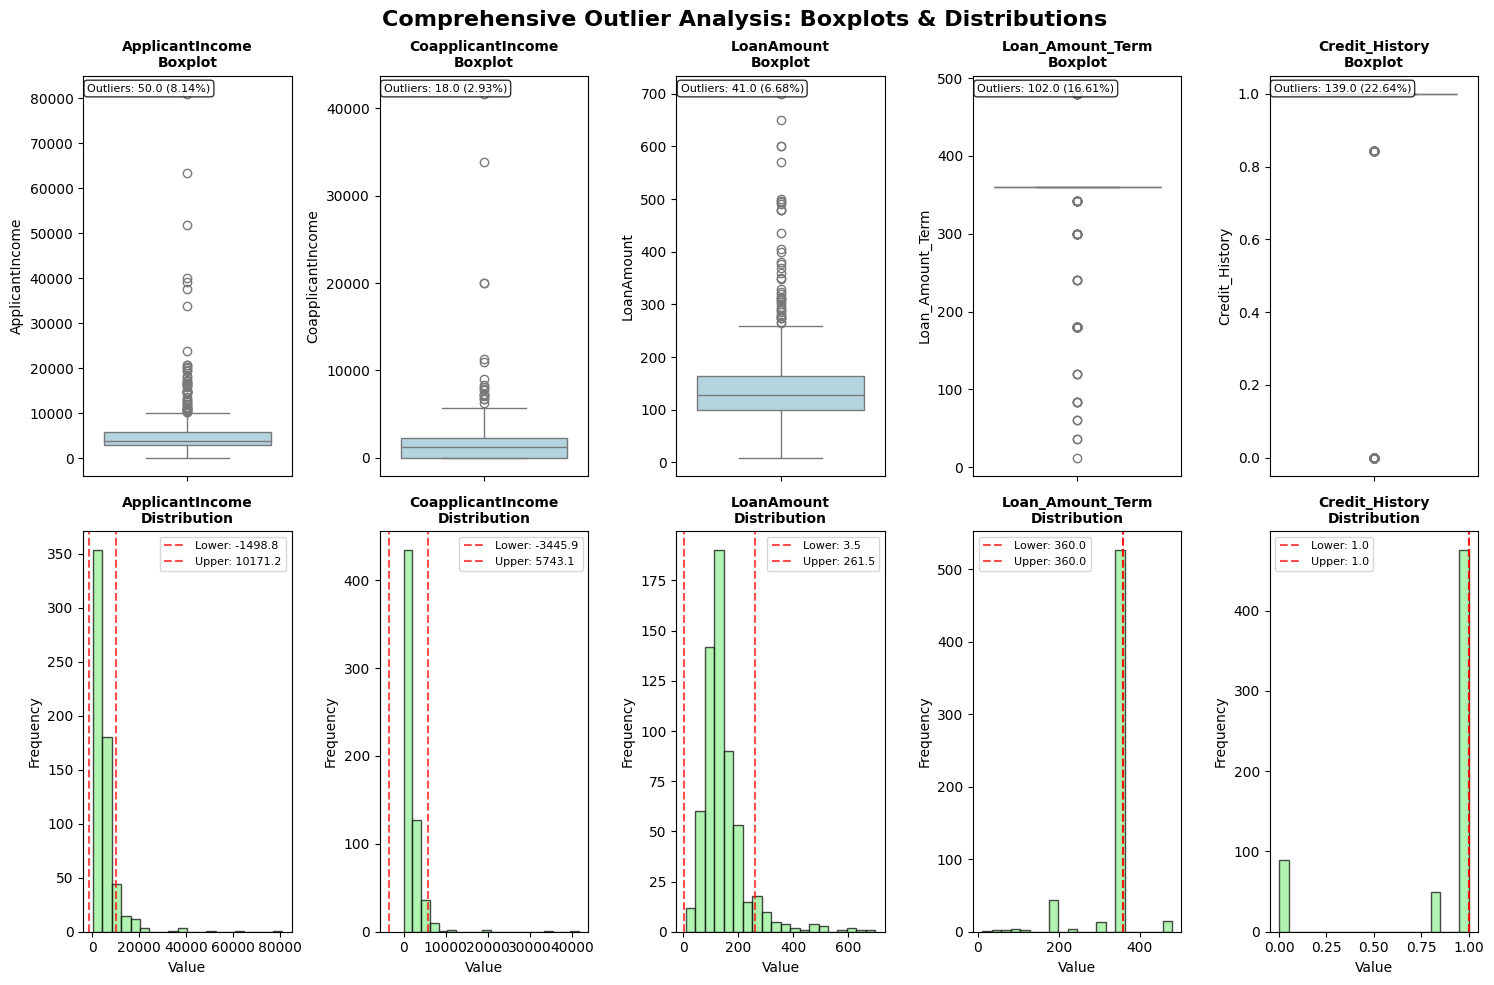

In [22]:
# Enhanced outlier visualization
print("OUTLIER VISUALIZATION")
print("=" * 50)

# Get all numeric columns for comprehensive analysis
numeric_cols_list = list(numeric_cols)

# Create enhanced plots
fig, axes = plt.subplots(2, len(numeric_cols_list), figsize=(15, 10))
if len(numeric_cols_list) == 1:
    axes = axes.reshape(2, 1)

for i, col in enumerate(numeric_cols_list):
    # Boxplot (top row)
    sns.boxplot(y=normalized_data_df[col], ax=axes[0, i], color="lightblue")
    axes[0, i].set_title(f"{col}\nBoxplot", fontsize=10, fontweight="bold")

    # Add outlier statistics to the plot
    outlier_count = outlier_df.loc[col, "outlier_count"]
    outlier_pct = outlier_df.loc[col, "outlier_percentage"]
    axes[0, i].text(
        0.02,
        0.98,
        f"Outliers: {outlier_count} ({outlier_pct}%)",
        transform=axes[0, i].transAxes,
        fontsize=8,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

    # Histogram with outlier highlighting (bottom row)
    axes[1, i].hist(
        normalized_data_df[col],
        bins=20,
        alpha=0.7,
        color="lightgreen",
        edgecolor="black",
    )

    # Highlight outlier regions
    lower_bound = outlier_df.loc[col, "lower_bound"]
    upper_bound = outlier_df.loc[col, "upper_bound"]

    # Add vertical lines for outlier boundaries
    axes[1, i].axvline(
        lower_bound,
        color="red",
        linestyle="--",
        alpha=0.7,
        label=f"Lower: {lower_bound:.1f}",
    )
    axes[1, i].axvline(
        upper_bound,
        color="red",
        linestyle="--",
        alpha=0.7,
        label=f"Upper: {upper_bound:.1f}",
    )

    axes[1, i].set_title(f"{col}\nDistribution", fontsize=10, fontweight="bold")
    axes[1, i].set_xlabel("Value")
    axes[1, i].set_ylabel("Frequency")
    axes[1, i].legend(fontsize=8)

plt.suptitle(
    "Comprehensive Outlier Analysis: Boxplots & Distributions",
    fontsize=16,
    fontweight="bold",
)
plt.tight_layout()
plt.show()


# Statistical Summary of Numerical Columns

In [23]:
# Select only numerical columns
numerical_cols = normalized_data_df.select_dtypes(include=["number"])

# Generate descriptive statistics
numerical_summary = numerical_cols.describe().T

# Add median to the summary for skewness check
numerical_summary["median"] = numerical_cols.median()

# Reorder columns for easier comparison
numerical_summary = numerical_summary[
    ["count", "mean", "median", "std", "min", "25%", "50%", "75%", "max"]
]

# Display the summary
numerical_summary


,count,mean,median,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,3812.5,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,1188.5,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,129.0,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,360.0,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,1.0,0.349681,0.0,1.00,1.0,1.00,1.0


# Distribution Analysis: Histograms

**Goal**: Visualize the distribution of individual numeric features to understand:
- Shape of distributions (normal, skewed, bimodal)
- Clustering of values 
- Gaps or spikes that may indicate data entry issues


DISTRIBUTION ANALYSIS - HISTOGRAMS


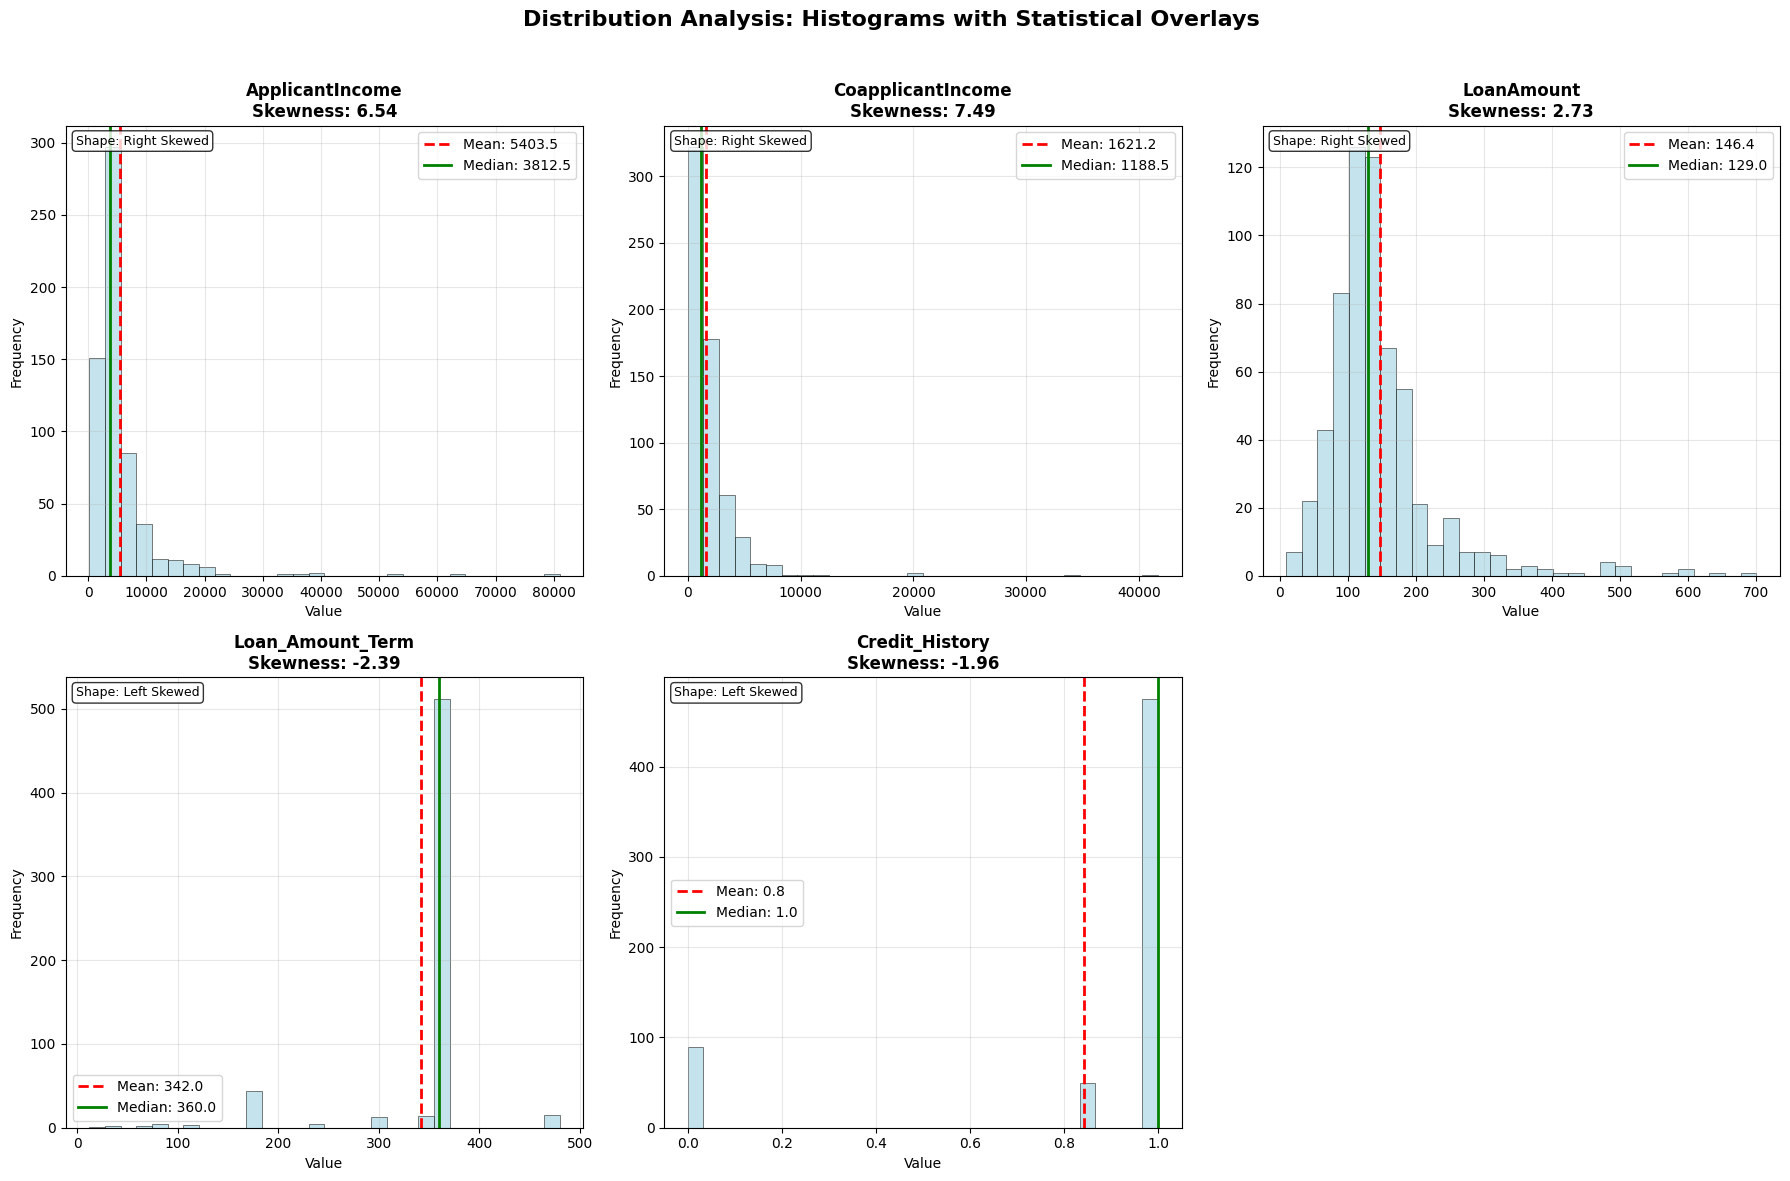

In [24]:
# Set up the plotting style
plt.style.use("default")
sns.set_palette("husl")

number_of_columns = 1 + len(numerical_columns) // 2

# Create comprehensive histogram analysis
fig, axes = plt.subplots(2, number_of_columns, figsize=(18, 12))
axes = axes.flatten()

print("DISTRIBUTION ANALYSIS - HISTOGRAMS")
print("=" * 50)
for i, col in enumerate(numerical_columns):
    # Calculate statistics for annotations
    mean_val = normalized_data_df[col].mean()
    median_val = normalized_data_df[col].median()
    skewness = normalized_data_df[col].skew()

    # Create histogram with enhanced styling
    axes[i].hist(
        normalized_data_df[col],
        bins=30,
        alpha=0.7,
        color="lightblue",
        edgecolor="black",
        linewidth=0.5,
    )

    # Add mean and median lines
    axes[i].axvline(
        mean_val,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {mean_val:.1f}",
    )
    axes[i].axvline(
        median_val,
        color="green",
        linestyle="-",
        linewidth=2,
        label=f"Median: {median_val:.1f}",
    )

    # Styling and labels
    axes[i].set_title(
        f"{col}\nSkewness: {skewness:.2f}", fontsize=12, fontweight="bold"
    )
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
    axes[i].legend(fontsize=10)
    axes[i].grid(True, alpha=0.3)

    # Add distribution shape annotation
    if abs(skewness) < 0.5:
        shape = "Approximately Normal"
    elif skewness > 0.5:
        shape = "Right Skewed"
    else:
        shape = "Left Skewed"

    axes[i].text(
        0.02,
        0.98,
        f"Shape: {shape}",
        transform=axes[i].transAxes,
        fontsize=9,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

# Remove empty subplot(s)
if len(numerical_columns) < 2 * number_of_columns:
    for i in range(len(numerical_columns), 2 * number_of_columns):
        axes[i].remove()

plt.suptitle(
    "Distribution Analysis: Histograms with Statistical Overlays \n\n",
    fontsize=16,
    fontweight="bold",
)
plt.tight_layout()
plt.show()


# Advanced Boxplot Analysis
**Goal**: Detect outliers and compare distributions across categorical segments.

BOXPLOT ANALYSIS - OUTLIER DETECTION


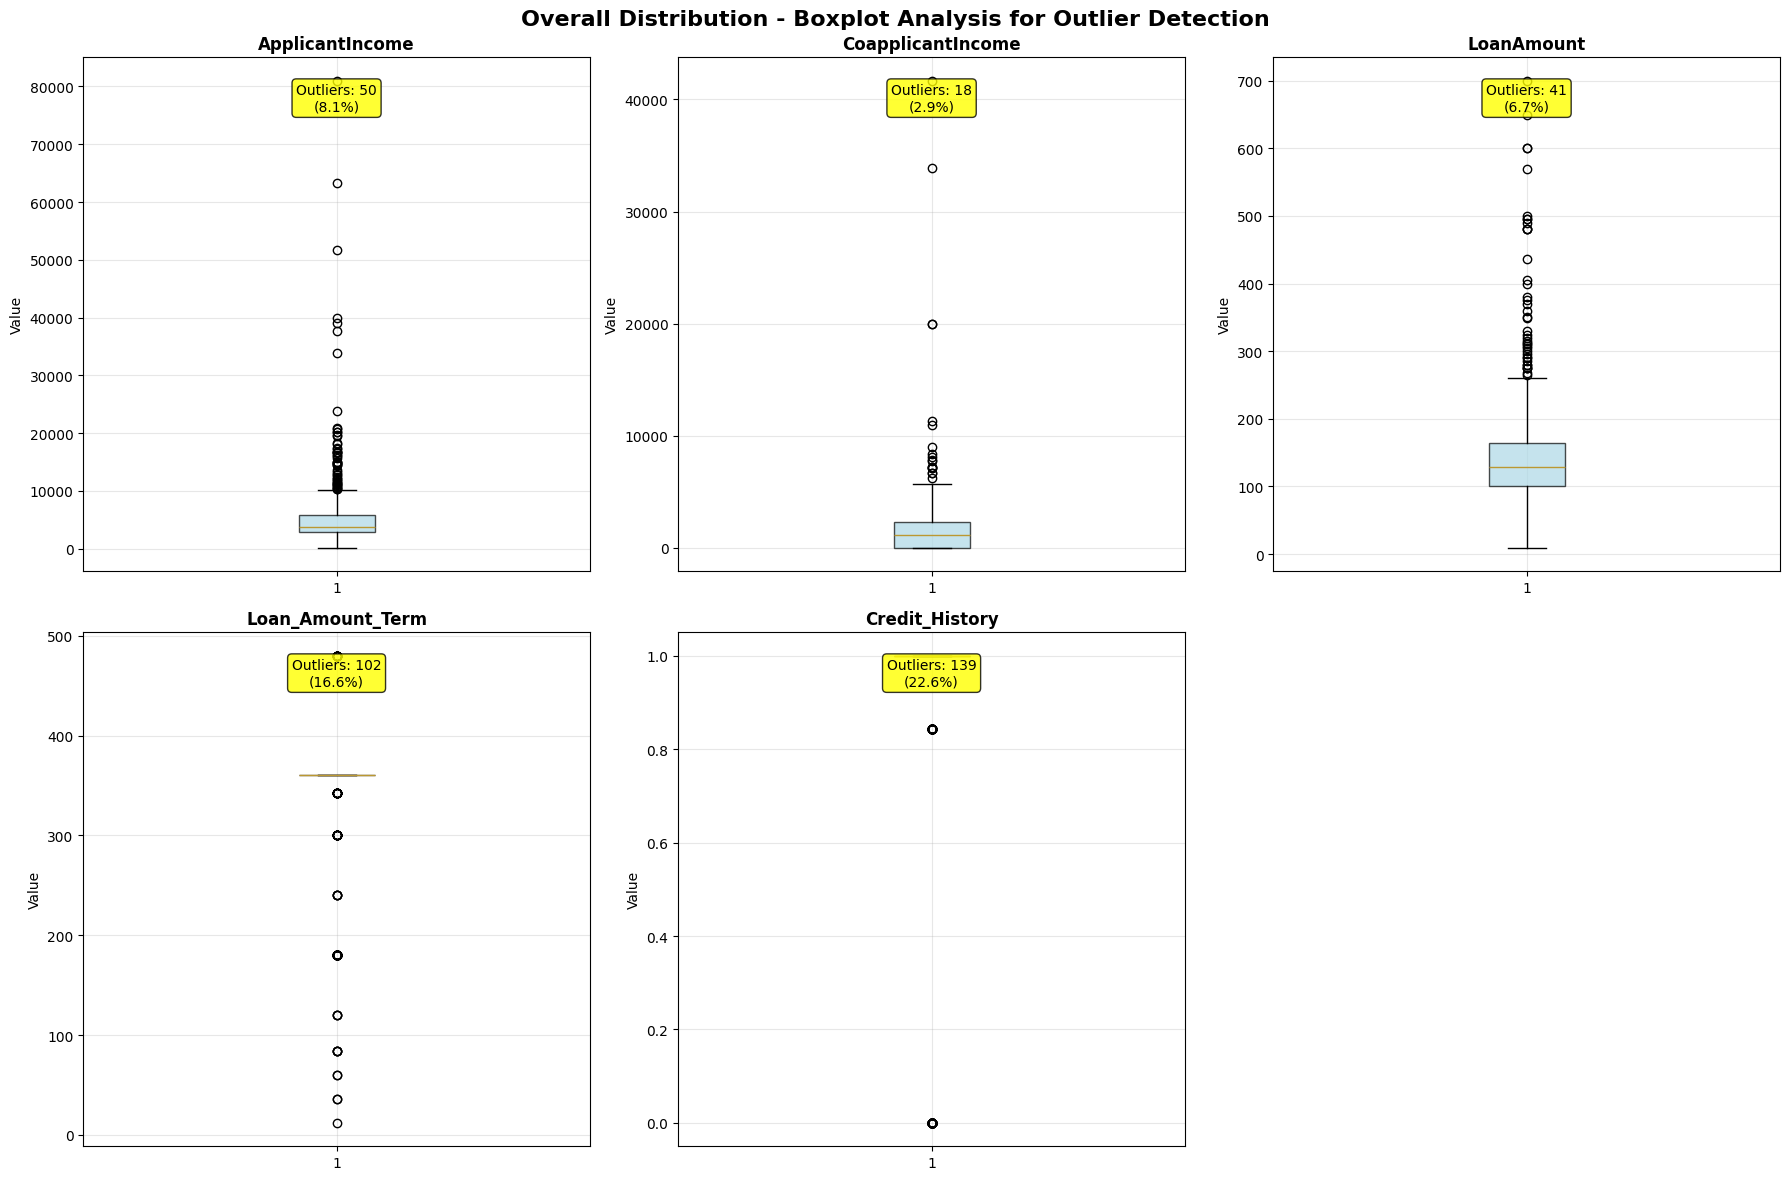

In [25]:
# 1. Overall Distribution Boxplots (Outlier Detection)
print("BOXPLOT ANALYSIS - OUTLIER DETECTION")
print("=" * 50)

# Create overall boxplots for outlier detection
fig, axes = plt.subplots(2, number_of_columns, figsize=(18, 12))
axes = axes.flatten()


outlier_insights = {}

for i, col in enumerate(numerical_columns):
    # Create boxplot
    box_plot = axes[i].boxplot(normalized_data_df[col], patch_artist=True)

    # Customize appearance
    box_plot["boxes"][0].set_facecolor("lightblue")
    box_plot["boxes"][0].set_alpha(0.7)

    axes[i].set_title(f"{col}", fontsize=12, fontweight="bold")
    axes[i].set_ylabel("Value")
    axes[i].grid(True, alpha=0.3)

    # Calculate outlier statistics
    Q1 = normalized_data_df[col].quantile(0.25)
    Q3 = normalized_data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = normalized_data_df[
        (normalized_data_df[col] < lower_bound)
        | (normalized_data_df[col] > upper_bound)
    ][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(normalized_data_df)) * 100

    # Store insights
    outlier_insights[col] = {
        "count": outlier_count,
        "percentage": outlier_percentage,
        "extreme_values": outliers.nlargest(3).tolist() if outlier_count > 0 else [],
    }

    # Add outlier info to plot
    axes[i].text(
        0.5,
        0.95,
        f"Outliers: {outlier_count}\n({outlier_percentage:.1f}%)",
        transform=axes[i].transAxes,
        fontsize=10,
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.8),
    )

# Remove empty subplot(s)
if len(numerical_columns) < 2 * number_of_columns:
    for i in range(len(numerical_columns), 2 * number_of_columns):
        axes[i].remove()

plt.suptitle(
    "Overall Distribution - Boxplot Analysis for Outlier Detection",
    fontsize=16,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

# Visualize Categorical Distributions (Bar Plots & Pie Charts)

**Goal**: Create beautiful and professional visualizations to understand the distribution of categorical variables:
- Interactive-style bar charts with value annotations
- Elegant pie charts with enhanced styling
- Comprehensive categorical analysis with insights

CATEGORICAL DISTRIBUTION ANALYSIS
Analyzing 7 categorical variables:
   • Gender
   • Married
   • Dependents
   • Education
   • Self_Employed
   • Property_Area
   • Loan_Status



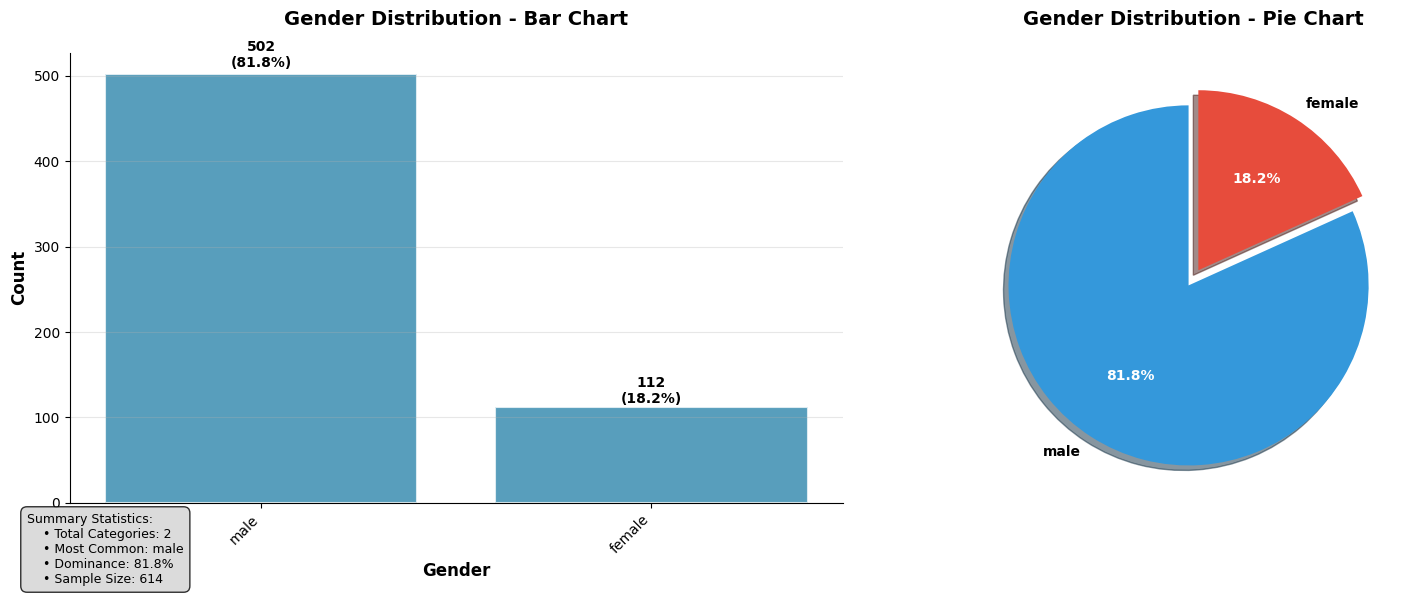

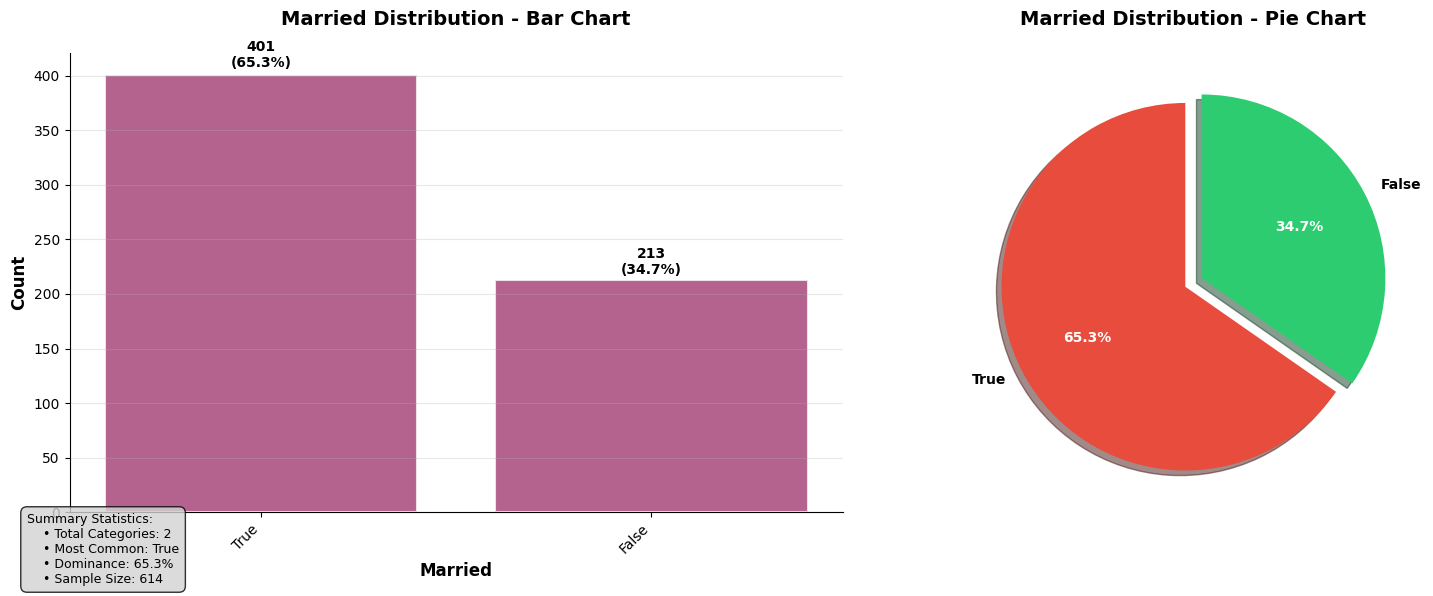

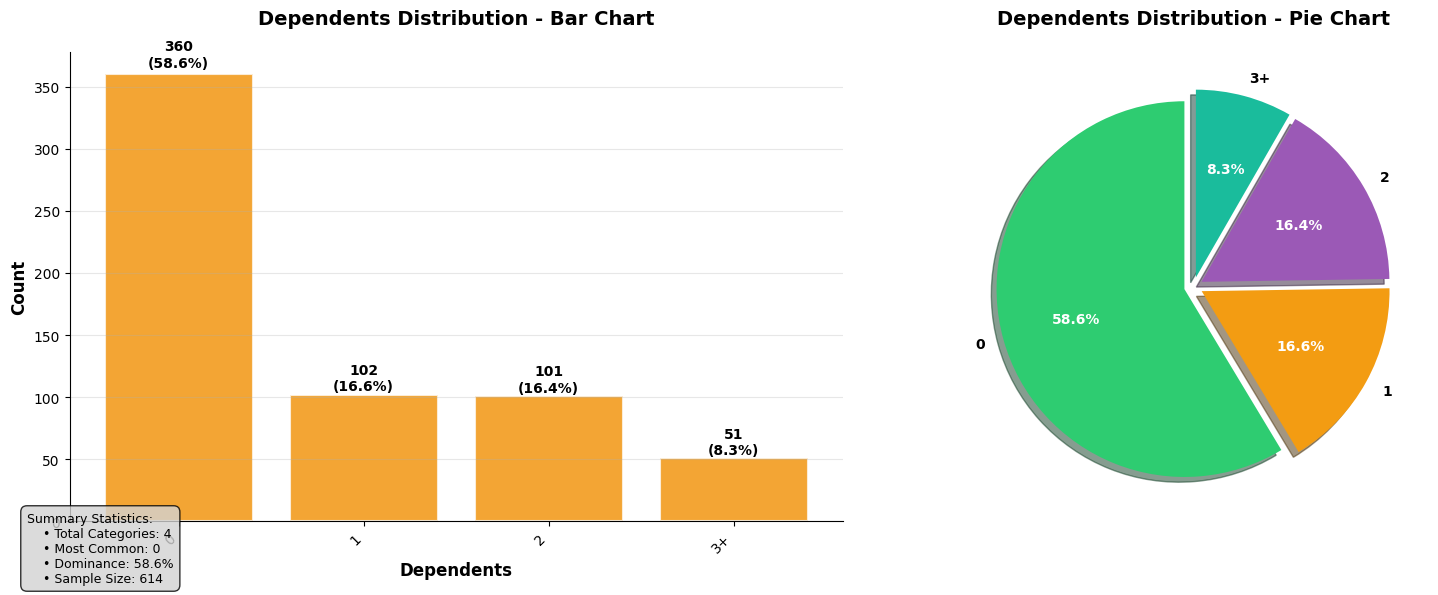

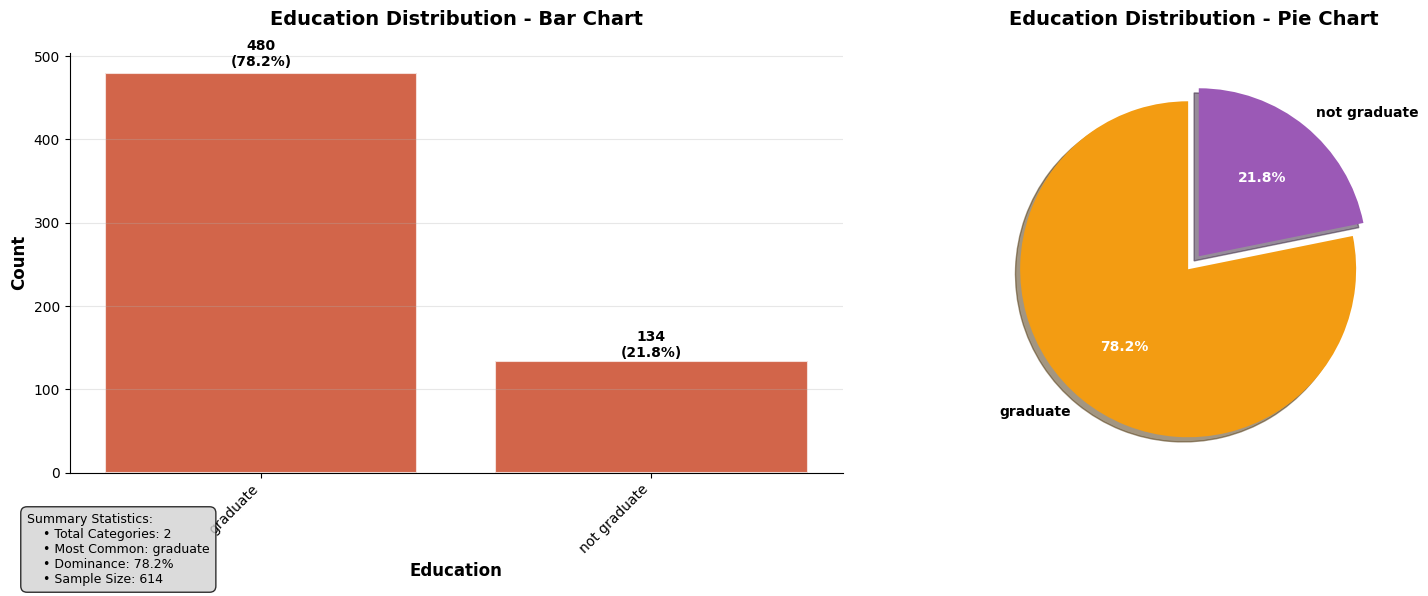

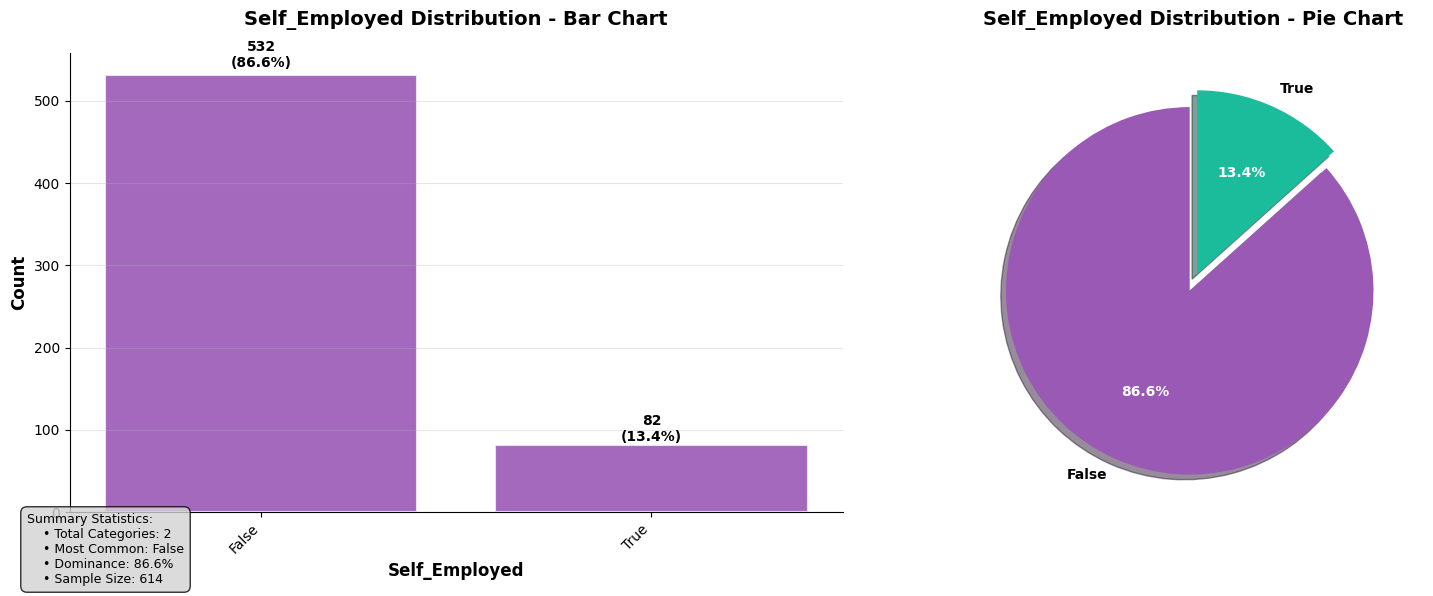

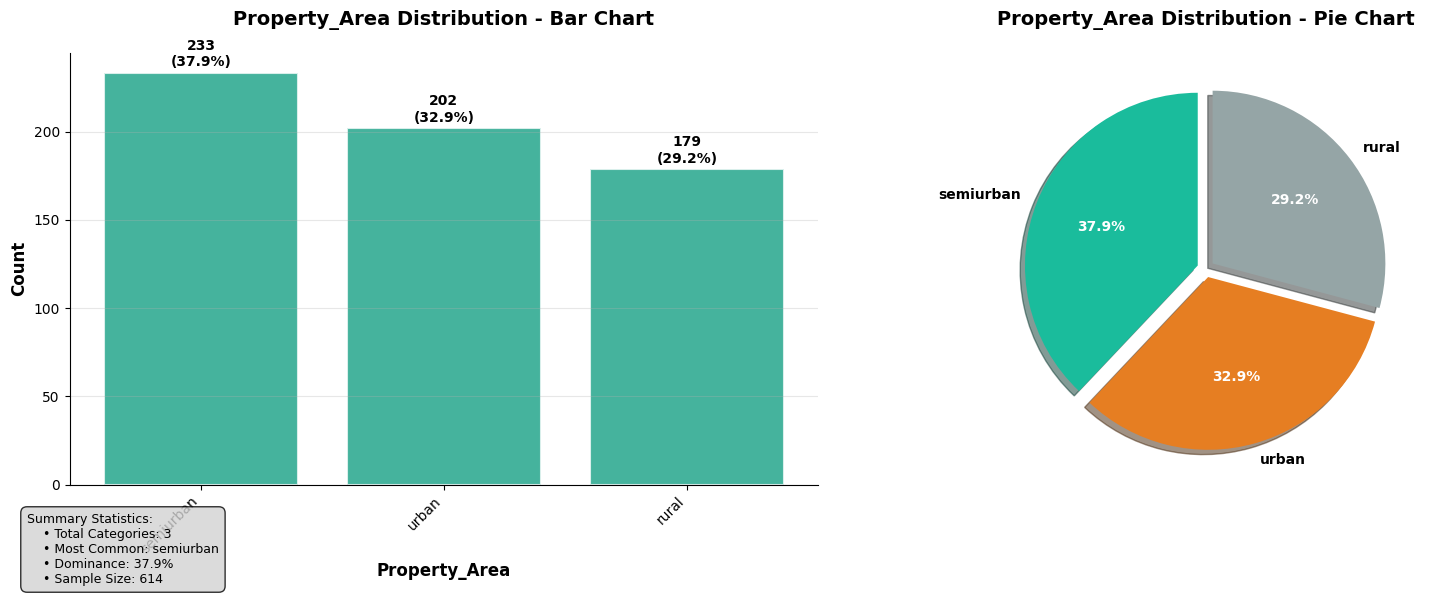

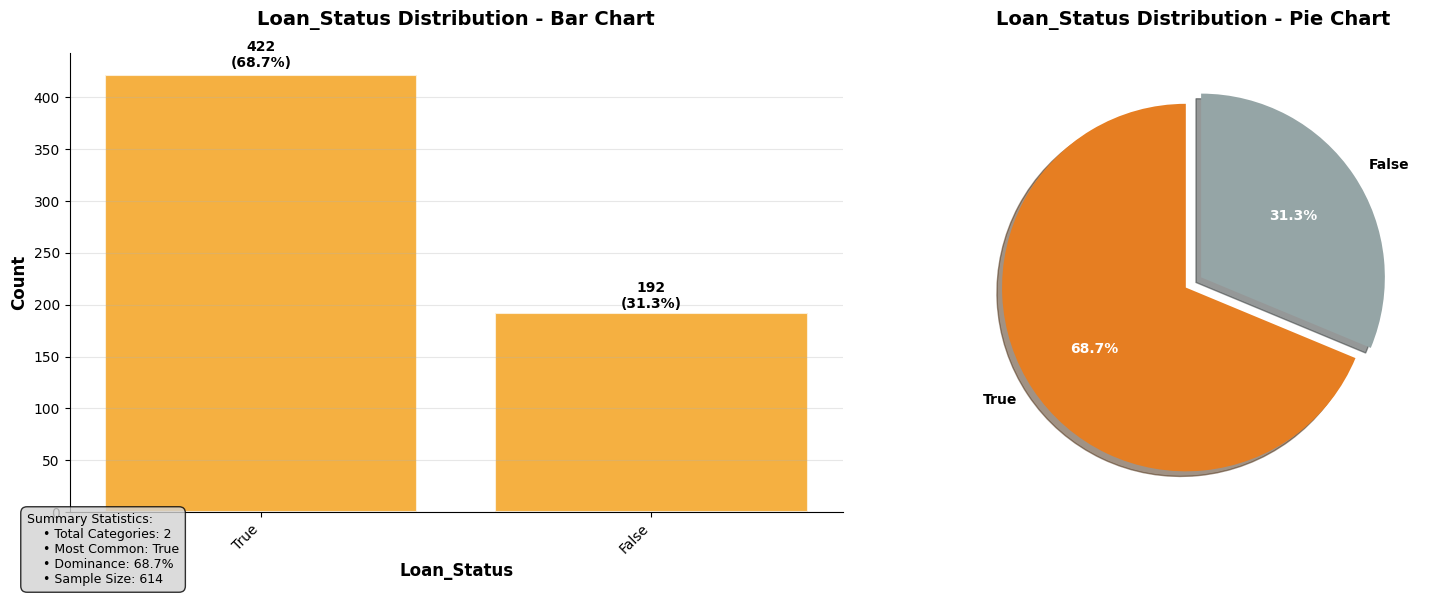

In [26]:
# Enhanced Categorical Distribution Analysis
print("CATEGORICAL DISTRIBUTION ANALYSIS")
print("=" * 50)

# Define color palettes
colors_bar = [
    "#2E86AB",
    "#A23B72",
    "#F18F01",
    "#C73E1D",
    "#8E44AD",
    "#16A085",
    "#F39C12",
    "#E74C3C",
]
colors_pie = [
    "#3498DB",
    "#E74C3C",
    "#2ECC71",
    "#F39C12",
    "#9B59B6",
    "#1ABC9C",
    "#E67E22",
    "#95A5A6",
]

# Filter out Loan_ID columns and get categorical columns for analysis
categorical_for_analysis = [col for col in categorical_columns if "Loan_ID" not in col]

print(f"Analyzing {len(categorical_for_analysis)} categorical variables:")
for col in categorical_for_analysis:
    print(f"   • {col}")

print("\n" + "=" * 50)

# Create enhanced visualizations for each categorical column
for i, col in enumerate(categorical_for_analysis):
    # Get value counts and calculate percentages
    value_counts = normalized_data_df[col].value_counts()
    percentages = (value_counts / len(normalized_data_df) * 100).round(1)

    # Create subplot with both bar chart and pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Enhanced Bar Chart (Left subplot)
    bars = ax1.bar(
        range(len(value_counts)),
        value_counts.values,
        color=colors_bar[i % len(colors_bar)],
        alpha=0.8,
        edgecolor="white",
        linewidth=1.5,
    )

    # Add value annotations on bars
    for j, (bar, count, pct) in enumerate(
        zip(bars, value_counts.values, percentages.values)
    ):
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + height * 0.01,
            f"{count}\n({pct}%)",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=10,
        )

    # Customize bar chart
    ax1.set_xlabel(col, fontsize=12, fontweight="bold")
    ax1.set_ylabel("Count", fontsize=12, fontweight="bold")
    ax1.set_title(
        f"{col} Distribution - Bar Chart", fontsize=14, fontweight="bold", pad=20
    )
    ax1.set_xticks(range(len(value_counts)))
    ax1.set_xticklabels(value_counts.index, rotation=45, ha="right")
    ax1.grid(axis="y", alpha=0.3)
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)

    # Enhanced Pie Chart (Right subplot)
    wedges, texts, autotexts = ax2.pie(
        value_counts.values,
        labels=value_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors_pie[
            i % len(colors_pie) : i % len(colors_pie) + len(value_counts)
        ],
        explode=[0.05] * len(value_counts),  # Slight separation for all slices
        shadow=True,
        textprops={"fontsize": 10, "fontweight": "bold"},
    )

    # Enhance pie chart text
    for autotext in autotexts:
        autotext.set_color("white")
        autotext.set_fontweight("bold")

    ax2.set_title(
        f"{col} Distribution - Pie Chart", fontsize=14, fontweight="bold", pad=20
    )

    # Add summary statistics as text box
    total_categories = len(value_counts)
    most_common = value_counts.index[0]
    most_common_pct = percentages.iloc[0]

    summary_text = f"""Summary Statistics:
    • Total Categories: {total_categories}
    • Most Common: {most_common}
    • Dominance: {most_common_pct}%
    • Sample Size: {len(normalized_data_df)}"""

    fig.text(
        0.02,
        0.02,
        summary_text,
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8),
    )

    plt.tight_layout()
    plt.show()


# Feature Selection (SelectKBest with Chi-Square)

In [29]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
encoded_df = normalized_data_df.copy()
for col in categorical_columns:
    if col == "Loan_ID":
        continue
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

display(encoded_df.head())

# Separate features and target
X = encoded_df.drop("Loan_Status", axis=1)  # assuming this is the target
y = encoded_df["Loan_Status"]

# Select top 5 features
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

print("Top 5 features selected by Chi-Square Test:")
print(selected_features)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Top 5 features selected by Chi-Square Test:
Index(['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History'],
      dtype='object')
